## Predicting Abalone Age


In [0]:
import pandas as pd


In [4]:
path = r"abalone.data"
df = pd.read_csv(path, header=None, names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
print('Size of weather data frame is :',df.shape)
#Let us see how our data looks like!
df.head()

Size of weather data frame is : (4177, 9)


Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]

# Data Pruning
Checking if any values are null or nan

In [5]:
print("Is null values")
print(df.isnull().sum())
print("Is NA values")
print(df.isna().sum())

Is null values
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Is NA values
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


No null values noted, So we need not prune anything here.

## Handling discrete values and Normalising numerical values


We can either use

1. One hot encoding OR
2. Label encoding.
We tried both the techniques and saw that one hot encoding performed better than the label encoding.






In [0]:
#Using one hot encoder
one_hot_encoder_sex = pd.get_dummies(df['Sex'])
df = df.join(one_hot_encoder_sex)

In [7]:
#Let us see how our data looks like!
print(df.head())

  Sex  Length  Diameter  Height  Whole weight  ...  Shell weight  Rings  F  I  M
0   M   0.455     0.365   0.095        0.5140  ...         0.150     15  0  0  1
1   M   0.350     0.265   0.090        0.2255  ...         0.070      7  0  0  1
2   F   0.530     0.420   0.135        0.6770  ...         0.210      9  1  0  0
3   M   0.440     0.365   0.125        0.5160  ...         0.155     10  0  0  1
4   I   0.330     0.255   0.080        0.2050  ...         0.055      7  0  1  0

[5 rows x 12 columns]


We drop the Sex column from the data frame as we have encoded it to one hot.

In [0]:
df = df.drop('Sex', axis = 1)
df['Rings'].add(1.5)
df.rename(columns={"Rings": "Age"}, inplace=True)

In [9]:
print(df.head())

   Length  Diameter  Height  Whole weight  ...  Age  F  I  M
0   0.455     0.365   0.095        0.5140  ...   15  0  0  1
1   0.350     0.265   0.090        0.2255  ...    7  0  0  1
2   0.530     0.420   0.135        0.6770  ...    9  1  0  0
3   0.440     0.365   0.125        0.5160  ...   10  0  0  1
4   0.330     0.255   0.080        0.2050  ...    7  0  1  0

[5 rows x 11 columns]


We can drop the rings column as we are predicting age which is in turn derived from rings.


In [10]:
print(df.head())

   Length  Diameter  Height  Whole weight  ...  Age  F  I  M
0   0.455     0.365   0.095        0.5140  ...   15  0  0  1
1   0.350     0.265   0.090        0.2255  ...    7  0  0  1
2   0.530     0.420   0.135        0.6770  ...    9  1  0  0
3   0.440     0.365   0.125        0.5160  ...   10  0  0  1
4   0.330     0.255   0.080        0.2050  ...    7  0  1  0

[5 rows x 11 columns]


## Data normalisation/Feature Scaling
Feature domination for eg:- Length/Diameter might dominate the height of  the abalone from above sample.
There are few scaling methods that can scale data reduce feature domination. 

1. Standard Scalar: scales features to -1 to 1 range with 0 mean.
2. MinMax Scalar: scales to 0 to 1 range.
3. QuantileTransformer: Fits data onto a normal distribution and reduces the effects of outliers
4. PowerTransformer: Fits data onto a Gaussian distribution.

Before, we proceed, it would be a good excercise to get some statistical analysis on features.

In [11]:
df.describe()

Length     Diameter  ...            I            M
count  4177.000000  4177.000000  ...  4177.000000  4177.000000
mean      0.523992     0.407881  ...     0.321283     0.365813
std       0.120093     0.099240  ...     0.467025     0.481715
min       0.075000     0.055000  ...     0.000000     0.000000
25%       0.450000     0.350000  ...     0.000000     0.000000
50%       0.545000     0.425000  ...     0.000000     0.000000
75%       0.615000     0.480000  ...     1.000000     1.000000
max       0.815000     0.650000  ...     1.000000     1.000000

[8 rows x 11 columns]

#### Inference :
It is clear from the std deviation that most of the data points are well surrounded around the mean. Scaling techniques like MinMacScalar might accidently include the influence of outliers. Nonetheless, we experiment with  
1. Standard Scalar
2. Quantile Transformer
3. MinMax Scalar

Currently, as data contains one hot encoding it would be great to use MinMaxScalar. But we could essentially apply different transformation on categorical versus numerical data.

For simplicity, we first experiment with MinMaxScalar.

In [0]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler()  # stnadard sclaer will scale some properties of one hot encoded data as well
scaler = preprocessing.QuantileTransformer() #(ignore_implicit_zeros=True) if used on one-hot encoded
#scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

We tried the three techniques. Quantile Transformer gave the best result among the three.

### Scaled Data

In [13]:
X.iloc[0:10]

Length  Diameter    Height  Whole weight  ...       Age    F    I    M
0  0.265265  0.302803  0.139640      0.304304  ...  0.925425  0.0  0.0  1.0
1  0.093594  0.097598  0.114114      0.116282  ...  0.154154  0.0  0.0  1.0
2  0.464464  0.488989  0.428428      0.421421  ...  0.419419  1.0  0.0  0.0
3  0.227728  0.302803  0.341341      0.306306  ...  0.577578  0.0  0.0  1.0
4  0.075075  0.083584  0.072573      0.100091  ...  0.154154  0.0  1.0  0.0
5  0.196196  0.154154  0.139640      0.190190  ...  0.268769  0.0  1.0  0.0
6  0.464464  0.468969  0.579580      0.484484  ...  0.988488  1.0  0.0  0.0
7  0.504004  0.505506  0.341341      0.476581  ...  0.945445  1.0  0.0  0.0
8  0.311311  0.315816  0.341341      0.300300  ...  0.419419  0.0  0.0  1.0
9  0.522022  0.561562  0.579580      0.573574  ...  0.981481  1.0  0.0  0.0

[10 rows x 11 columns]

In [168]:

print(df.columns)
X = df.loc[:,df.columns!='Age']
y = df[['Age']]
X_rest = df.loc[:,df.columns!='Age']
print(X.head())
print(y.shape)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age', 'F', 'I', 'M'],
      dtype='object')
     Length  Diameter    Height  Whole weight  ...  Shell weight    F    I    M
0  0.265265  0.302803  0.139640      0.304304  ...      0.299800  0.0  0.0  1.0
1  0.093594  0.097598  0.114114      0.116282  ...      0.112613  0.0  0.0  1.0
2  0.464464  0.488989  0.428428      0.421421  ...      0.447447  1.0  0.0  0.0
3  0.227728  0.302803  0.341341      0.306306  ...      0.313814  0.0  0.0  1.0
4  0.075075  0.083584  0.072573      0.100091  ...      0.082082  0.0  1.0  0.0

[5 rows x 10 columns]
(4177, 1)


# Feature Selection
There are multitude of methods for feature selection. We use the following two -
1. Univariate feature selection : This method allows us to select atmost K best features by evaluating the dataset with variety of different methods such as chi square, mutual info etc.
2. Corerelation co-efficient : We get corerelation between any two features as well as corerelation between expected output and its feature.

#####Lets try with univariate feature selection (SelectKBest) as we can select the top k best features for our model.
#####Selecting top 5 features.

In [15]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(mutual_info_regression, k=7)
selector.fit(X, y)
X_fs = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 5 columns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


We tried with 5 best features as well as all 7 features. It was seen that all 7 features model yielded better result than the 5 feature model.

### 2. Correlation coeff.

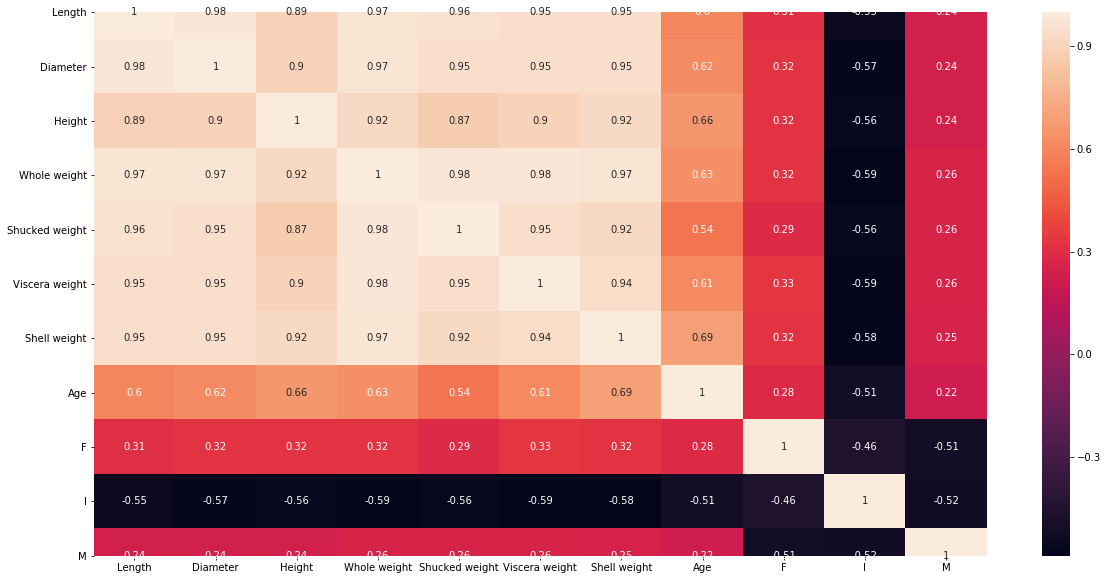

In [16]:
from matplotlib.pyplot import figure
import seaborn as sns 
boston_corr_mat = df.corr().round(2)
figure(figsize = (20,10))

sns.heatmap(data=boston_corr_mat, annot=True)

#### Observations:
One hot encoded features for sex(F,I,M) are not very well correlated to other features.
height, Whole weight and viscera weight are closely correlated to other features. But keeping any one of them (dropping other two) did NOT yeild any better results.
Though there is no good correlation between age and other features , all fetaures taken together yielded much better results.

### 3. PCA Principal Component Analysis
It performs dimensionality reduction by removing highly dependent features. After performing PCA, we get most of the features except for the Sex related features which corresponds with the univariate analysis results. Hence we will be using all the 7 features in our modelling.

In [17]:
from sklearn.decomposition import PCA
df.head()
X = df.drop(labels=['Age'], axis=1)

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(pca.components_,columns=X.columns)
df_pca.head()

Length  Diameter    Height  ...         F         I         M
0 -0.317495 -0.319018 -0.306972  ... -0.228071  0.442029 -0.213958
1 -0.022631 -0.022770 -0.024577  ... -0.661301 -0.082311  0.743612
2  0.226404  0.215483  0.182312  ... -0.420643  0.681026 -0.260383
3  0.249706  0.179041 -0.847345  ...  0.014767 -0.016136  0.001369
4 -0.261341 -0.377822  0.250599  ...  0.000221  0.005840 -0.006061

[5 rows x 10 columns]

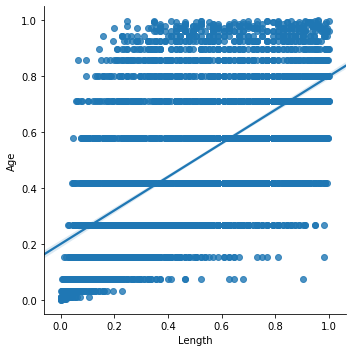

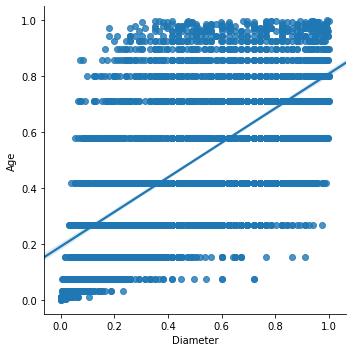

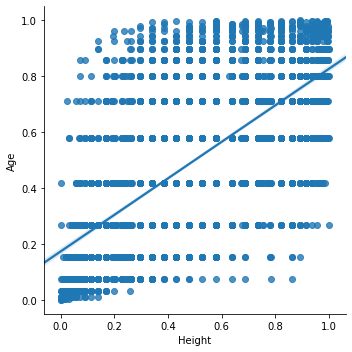

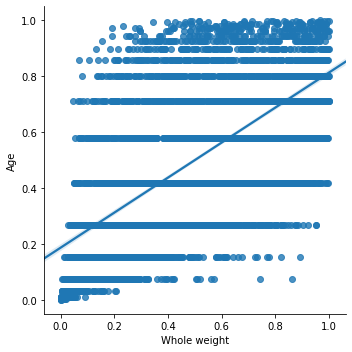

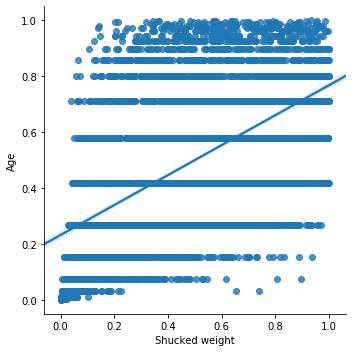

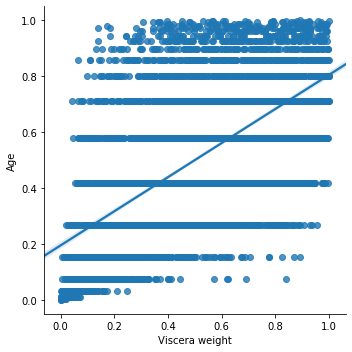

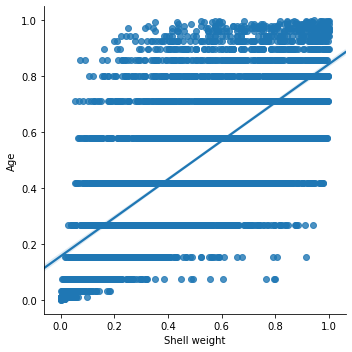

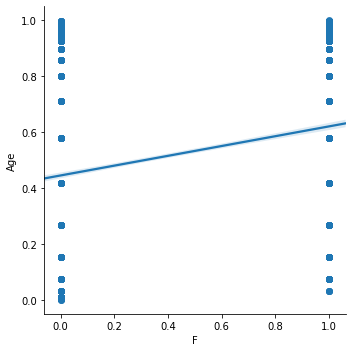

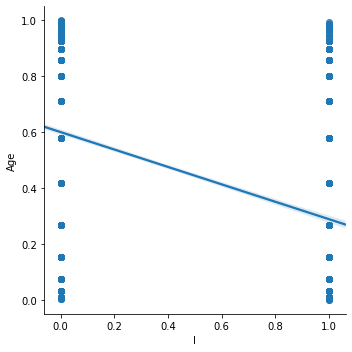

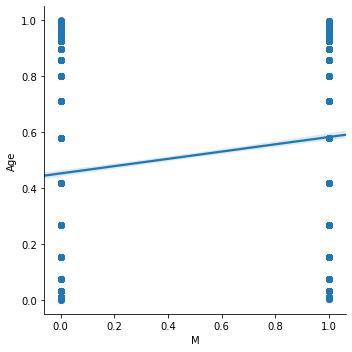

In [18]:
for col in X:
  sns.lmplot(x=col, y="Age", data=df);

This clearly indicates that most of the features are not good at estimating, which would indicate usage of higher orde features.

## Train test split 80:20

## Training
1. Select models and apply hyper parameters.
2. Use cross validation (k-fold).
We divide the trainh data into k subparts, train on k-1 parts and test on the reamining 1 part. Here we use 3 or 5 as our cv parameter.
3. Use GridSearch CV
here we list all the combinations of the hyper parameters that we would like to run the algorithm on.
4. In both the regressors, we used polynomial features as the algorithms could not yield the linear combinations of the features, that yielded significantly better than baseline results. 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size = 0.2, random_state = 42)


## Using different models


## SGDRegressor (Stochastic Gradient Regressor)
### Train
About Hyper-Parameters
1. Trying both l1 & l2 regularization penalty
2. alpha: Using regularization with large range
3. learning_rate: Tried all types of learning rates other than constant rate. invscaling seemed to be most prmoising in the results. 



In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

poly_reg = PolynomialFeatures(degree = 3)
X_train_reg_poly = poly_reg.fit_transform(X_train)
X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
#X_train_reg_poly = X_train
#X_test_reg_poly = X_test
## Hyper parameters

hyperparameters = dict(
    loss=['squared_loss', 'huber'],
    penalty=['l1', 'l2'],
    alpha=[0.1, 0.001, 0.0001, 0.00001],  # Regularization parameter
    learning_rate=['invscaling','optimal','adaptive'], 
    tol=[0.00001, 0.0000001 ],
    max_iter=[1000, 1000000])                   

#hyperparameters=dict()           # dry run

clf = GridSearchCV(SGDRegressor(), hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train_reg_poly, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#### Train and print best model

In [21]:
#best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

Best parameters set found on development set:

{}


We found in the dry run that GradientBoostingRegressor performed much better than the SGD regressor.


### Test & F1 score, Accuracy

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred)

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

Report :

R2 0.5285572438579718
MSE 0.039092451774417857


## GradientBoostingRegressor
### Train
About Hyper-Parameters
1. min_impurity_split : It arrests the growth of the tree. Particular node is split if a certain threshold is crossed.
2. alpha: Tried a varied range frpm 0.1 - 0.00001

In [0]:
%%capture
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 5)
X_train_reg_poly = poly_reg.fit_transform(X_train)
X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
#X_train_reg_poly = X_train
#X_test_reg_poly = X_test

## Hyper parameters

hyperparameters = dict(
    loss=['ls', 'lad'],
    alpha=[0.001, 0.0001, 0.00001],  # Regularization parameter
    tol=[0.0001],
    max_depth=[3,5,7],
    min_impurity_split=[0.00001,0.0000001, 0.000000001])                   

#hyperparameters=dict()           # dry run

clf = GridSearchCV(GradientBoostingRegressor(), hyperparameters, cv=3, verbose=1)
best_model = clf.fit(X_train_reg_poly, y_train)

### Train and print best model

In [24]:
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)


Best parameters set found on development set:

{'alpha': 1e-05, 'loss': 'ls', 'max_depth': 3, 'min_impurity_split': 1e-05, 'tol': 0.0001}


### Test & F1 score, Accuracy

Report :

R2 0.5983066905917641
MSE 0.033308765744227455


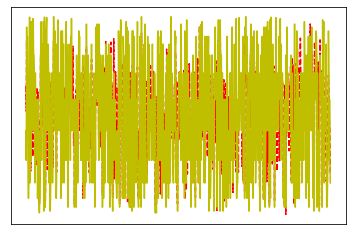

(836, 1)
(836, 1)
           Age
866   0.419419
1483  0.268769
599   0.945445
1702  0.419419
670   0.897898
...        ...
3093  0.712212
1651  0.268769
2897  0.577578
3953  0.268769
1830  0.154154

[836 rows x 1 columns]
          Age
0    0.644107
1    0.517785
2    0.877736
3    0.659131
4    0.618659
..        ...
831  0.641559
832  0.525255
833  0.454412
834  0.421609
835  0.195562

[836 rows x 1 columns]


In [45]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred, multioutput='variance_weighted')

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

# Plot of Y_test versus Y_pred
x_axis = np.array(range(0, y_pred.shape[0]))
plt.plot(x_axis, y_pred, linestyle="--", color='r', label="Y_pred")     # regression line
plt.plot(x_axis, y_test, color='y', label="Y_test")  
plt.xticks(())
plt.yticks(())
plt.show()


The model does a fair job for most of the data.
Gives much better r2 score than using MinMaxScaled features.
Now, considering tolerance x for the output,
we actually set the prediction output equal test output if it is within x+=3 years limit.



In [174]:
#y_pred = pd.Series(y_pred, name="Age").to_frame()
y_pred = pd.Series(y_pred, name="Age").to_frame()
X_test = pd.DataFrame(X_test)
p = pd.DataFrame(X_rest[0:836])
p = X_rest[0:836]
k = y_test["Age"].tolist()
print(len(k))
p["Age"] = k
p.head()
p.insert(7, "Age1", p["Age"])
p=p.drop(labels=["Age"], axis=1)
p_test=p.rename(columns={"Age1":"Age"})
p_trans = scaler.inverse_transform(p_test)
y_test_act = p_trans[:,7]
p_test.head()
p_test["Age"] = y_pred["Age"].values
p_trans = scaler.inverse_transform(p_test)
y_pred_act = p_trans[:,7]

for i in range(len(y_test_act)):
  y_pred_act[i] = y_test_act[i] if abs(y_test_act[i]-y_pred_act[i]) < 3 else y_pred_act[i]

mse_lrm=mean_squared_error(y_test_act, y_pred_act)
r2_lrm=r2_score(y_test_act, y_pred_act, multioutput='variance_weighted')

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

836
Report :

R2 0.7957339599523485
MSE 0.3943256395979311


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



## Conclusion:

We tried different combinations of feature selection and feature scaling techniques. Quantile Transformer & onehot encoding resulted in the best results. Importantly, none of the features had a high co-relation with Abalone age. Polynomial features upto degree 3 yielded best results of mean squared error along with increase in r2 value. It also improved the r2 score of 0.35 of base line to 79.8%. GradientBoostingRegressor yielded best results than SGD regressor. Also, MSE reduced to 0.39. Alongwith, polynomial regression, hyper parameter tuning helped improve the scores.
